Reference: https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_multiclass.html#sphx-glr-auto-examples-calibration-plot-calibration-multiclass-py

In [2]:
import sklearn
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

np.random.seed(0)

X, y = make_blobs(
    n_samples=2000, n_features=2, centers=3, random_state=42, cluster_std=5.0
)
X_train, y_train = X[:600], y[:600]
X_valid, y_valid = X[600:1000], y[600:1000]
X_train_valid, y_train_valid = X[:1000], y[:1000]
X_test, y_test = X[1000:], y[1000:]

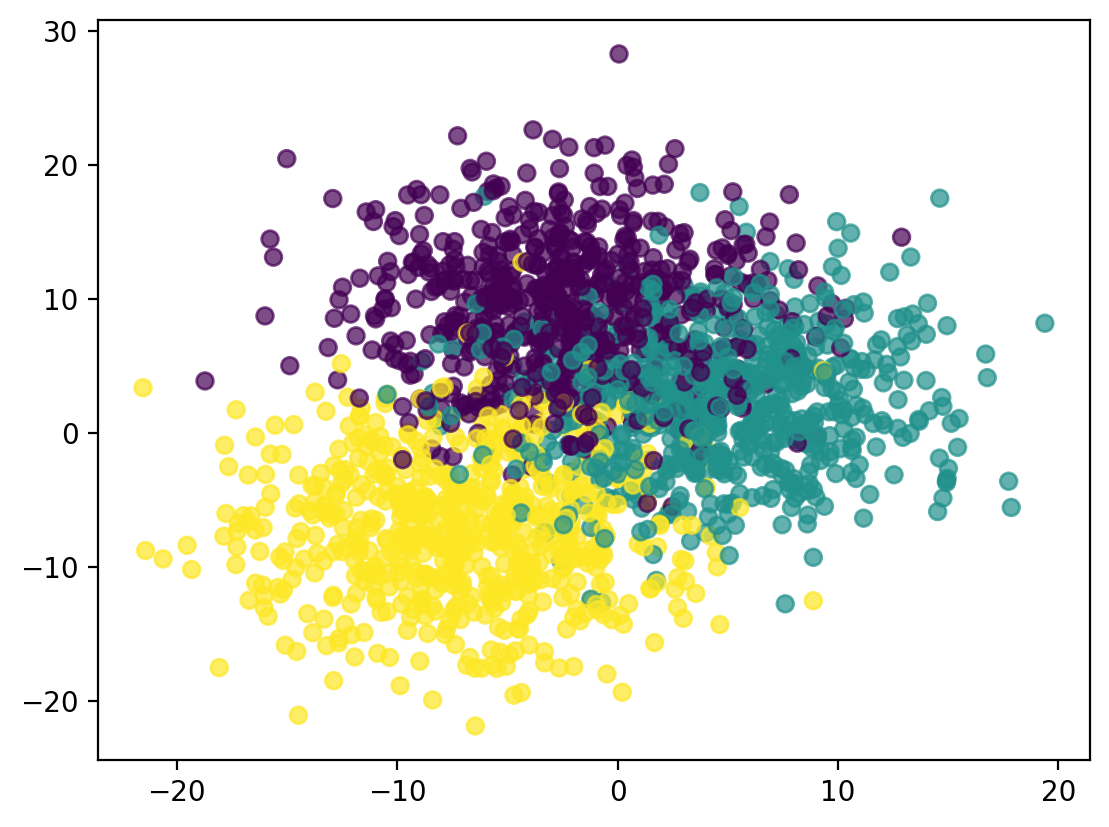

In [13]:
# Scater plot showing different classes in different colors
plt.scatter(X[:, 0], X[:, 1], c=y ,alpha=0.7)

In [3]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
prob_df = pd.DataFrame(lr.predict_proba(X_valid))
prob_df.columns = lr.classes_
prob_df.head()

,0,1,2
0,0.014323,0.959135,0.026542
1,0.000326,0.004617,0.995057
2,0.667887,0.322486,0.009627
3,0.953779,0.043703,0.002518
4,0.000029,0.000130,0.999841


In [51]:
pd.Series(prob_df.values[np.arange(400), y_valid]).quantile(0.1)

0.3934260593598625

In [38]:
# Get the predicted probability for the correct class for each sample
y_valid

array([1, 2, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2,
       1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1,
       0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1,
       0, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1,
       2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 0, 2,
       1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 0, 0,
       2, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2,
       0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 0, 1,
       1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1,
       0, 1, 0, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 2, 0,
       1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2,

In [39]:
# Get the predicted probability for the correct class for each sample


,1,2,0,0,2,2,2,1,1,2,...,2,0,0,1,0,0,2,2,2,2
0,0.959135,0.026542,0.014323,0.014323,0.026542,0.026542,0.026542,0.959135,0.959135,0.026542,...,0.026542,0.014323,0.014323,0.959135,0.014323,0.014323,0.026542,0.026542,0.026542,0.026542
1,0.004617,0.995057,0.000326,0.000326,0.995057,0.995057,0.995057,0.004617,0.004617,0.995057,...,0.995057,0.000326,0.000326,0.004617,0.000326,0.000326,0.995057,0.995057,0.995057,0.995057
2,0.322486,0.009627,0.667887,0.667887,0.009627,0.009627,0.009627,0.322486,0.322486,0.009627,...,0.009627,0.667887,0.667887,0.322486,0.667887,0.667887,0.009627,0.009627,0.009627,0.009627
3,0.043703,0.002518,0.953779,0.953779,0.002518,0.002518,0.002518,0.043703,0.043703,0.002518,...,0.002518,0.953779,0.953779,0.043703,0.953779,0.953779,0.002518,0.002518,0.002518,0.002518
4,0.000130,0.999841,0.000029,0.000029,0.999841,0.999841,0.999841,0.000130,0.000130,0.999841,...,0.999841,0.000029,0.000029,0.000130,0.000029,0.000029,0.999841,0.999841,0.999841,0.999841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.253215,0.038669,0.708116,0.708116,0.038669,0.038669,0.038669,0.253215,0.253215,0.038669,...,0.038669,0.708116,0.708116,0.253215,0.708116,0.708116,0.038669,0.038669,0.038669,0.038669
396,0.000339,0.999576,0.000086,0.000086,0.999576,0.999576,0.999576,0.000339,0.000339,0.999576,...,0.999576,0.000086,0.000086,0.000339,0.000086,0.000086,0.999576,0.999576,0.999576,0.999576
397,0.019843,0.980018,0.000139,0.000139,0.980018,0.980018,0.980018,0.019843,0.019843,0.980018,...,0.980018,0.000139,0.000139,0.019843,0.000139,0.000139,0.980018,0.980018,0.980018,0.980018
398,0.000094,0.999780,0.000126,0.000126,0.999780,0.999780,0.999780,0.000094,0.000094,0.999780,...,0.999780,0.000126,0.000126,0.000094,0.000126,0.000126,0.999780,0.999780,0.999780,0.999780
